# Resultados

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

---

resultados mlp

In [29]:
mlp_error_hog = f"../resultados/MLP/HOG/error.txt"
mlp_error_lbp = f"../resultados/MLP/LBP/error.txt"

mlp_preds_hog = pd.read_csv("../resultados/MLP/HOG/compare_y.csv")
mlp_preds_lbp = pd.read_csv("../resultados/MLP/LBP/compare_y.csv")

In [30]:
def calc_acc(y, y_pred):
    return np.sum(y == y_pred)/len(y)

In [31]:
mlp_acc_hog = calc_acc(mlp_preds_hog["y_test"].values, mlp_preds_hog["y_predict"].values)

In [32]:
mlp_acc_lbp = calc_acc(mlp_preds_lbp["y_test"].values, mlp_preds_lbp["y_predict"].values)

---

resultados reglog

In [33]:
rglog_preds_hog = pd.read_csv("../resultados/RegLog/HOG/compare_y.csv")
rglog_preds_lbp = pd.read_csv("../resultados/RegLog/LBP/compare_y.csv")

In [34]:
rglog_acc_hog = calc_acc(rglog_preds_hog["y_test"].values, rglog_preds_hog["y_predict"].values)

In [35]:
rglog_acc_lbp = calc_acc(rglog_preds_lbp["y_test"].values, rglog_preds_lbp["y_predict"].values)

---

resultados SVM

In [36]:
#rglog_preds_hog = pd.read_csv("../resultados/SVM/HOG/compare_y.csv")
#rglog_preds_lbp = pd.read_csv("../resultados/SVM/LBP/compare_y.csv")

In [62]:
svm_acc_hog = 0.49
svm_acc_lbp = 0.61

---

resultados convnet

In [63]:
cnet_preds = pd.read_csv("../resultados/ConvNet/convnet_test_preds.csv")

In [64]:
cnet_acc = calc_acc(cnet_preds["y_true"].values, cnet_preds["y_pred"].values)

---

comp

In [65]:
resultados = [
    svm_acc_hog,
    svm_acc_lbp,
    rglog_acc_hog,
    rglog_acc_lbp,
    mlp_acc_hog,
    mlp_acc_lbp,
    cnet_acc,
]

modelos = [
    "SVM",
    "SVM",
    "RegLog",
    "RegLog",
    "MLP",
    "MLP",
    "CONVNET",
]

dataset = [
    "HOG",
    "LBP",
    "HOG",
    "LBP",
    "HOG",
    "LBP",
    "RAW",
]

resultados_df = pd.DataFrame({
    "Modelo": modelos,
    "Dataset": dataset,
    "Acurácia": resultados,
})

In [66]:
resultados_df

,Modelo,Dataset,Acurácia
0,SVM,HOG,0.490000
1,SVM,LBP,0.610000
2,RegLog,HOG,0.499479
3,RegLog,LBP,0.525547
4,MLP,HOG,0.482795
5,MLP,LBP,0.617310
6,CONVNET,RAW,0.648958


---

In [67]:
import seaborn as sns

In [70]:
colors = ["#E63774", "#20BDE6", "#E6D731"]
customPalette = sns.set_palette(sns.color_palette(colors))

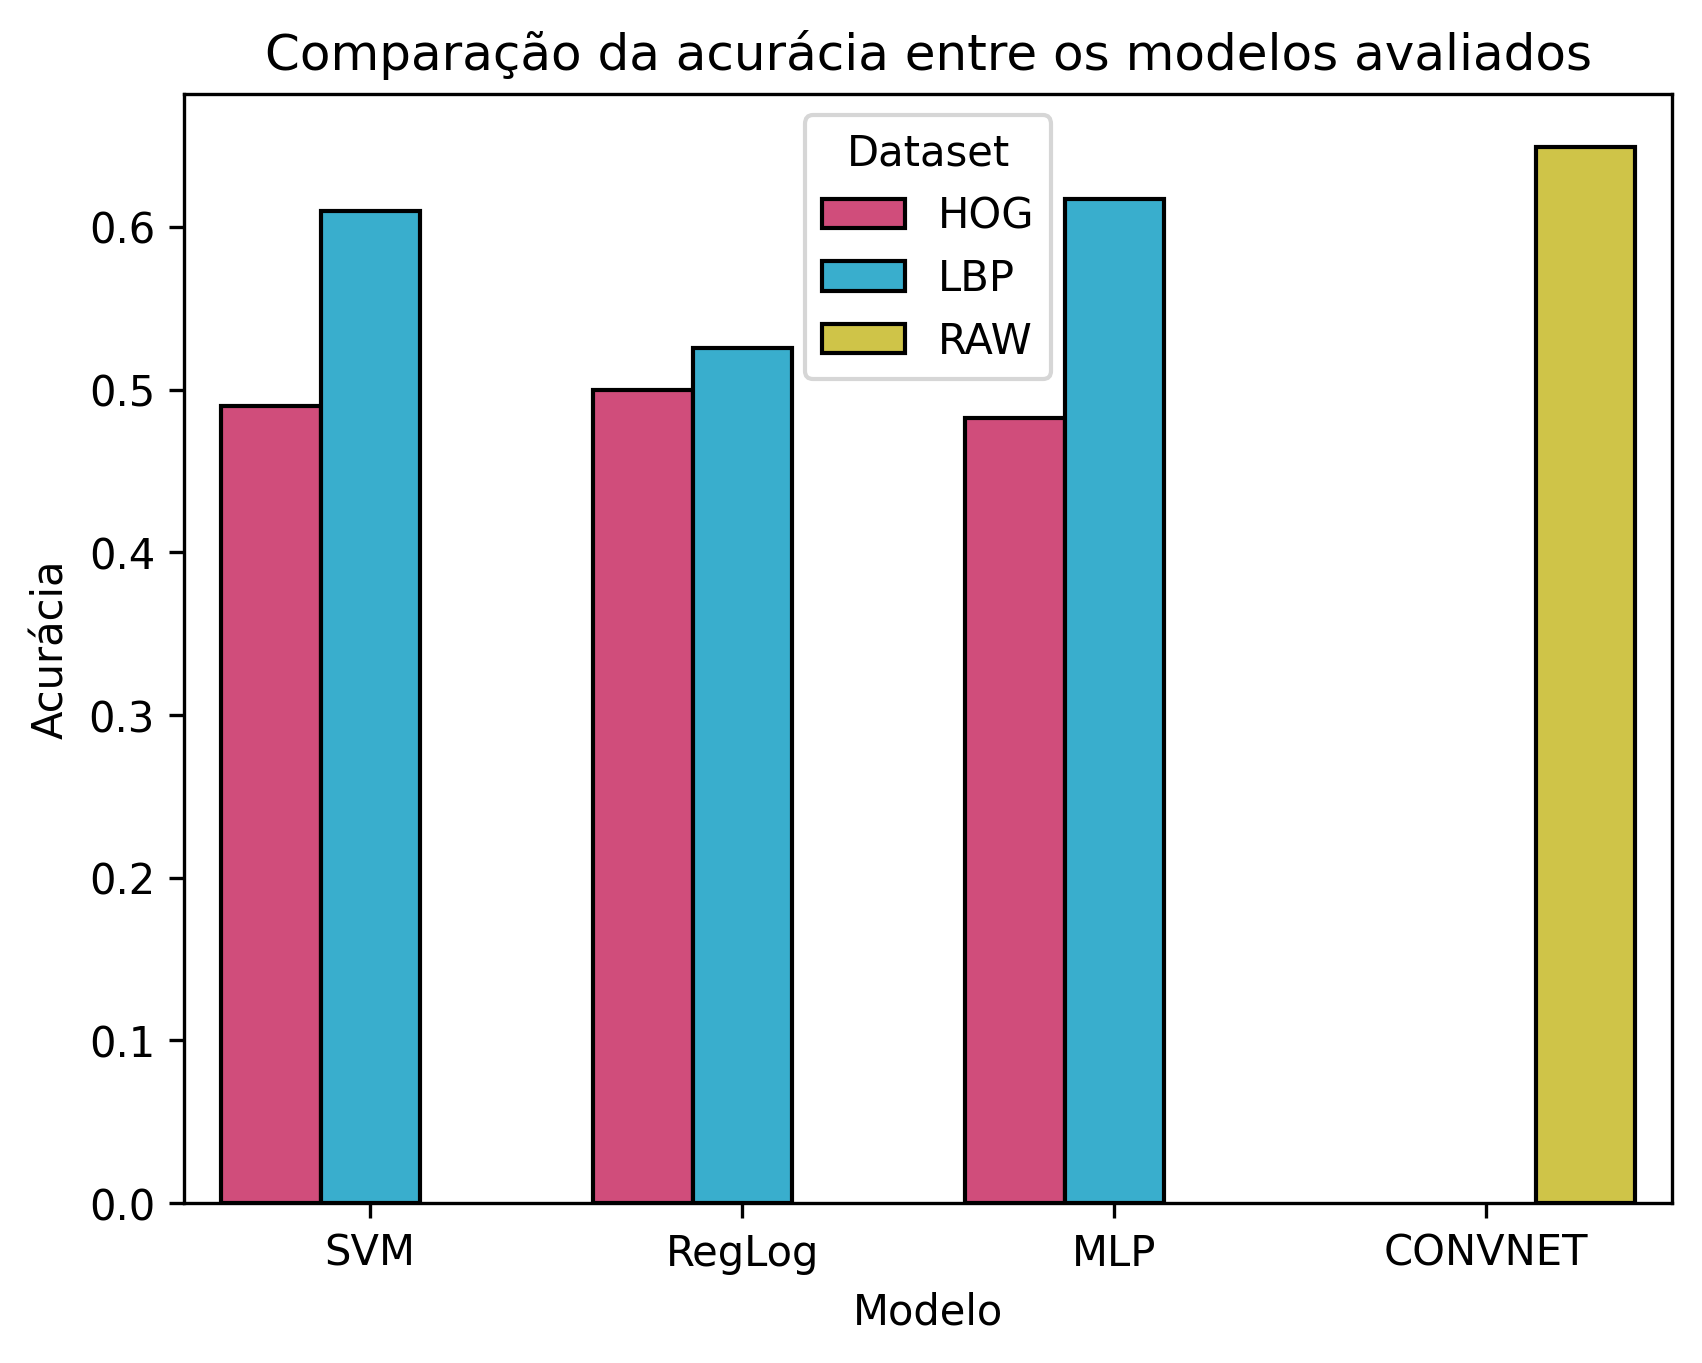

In [71]:
fig, ax = plt.subplots(dpi=300)
sns.barplot(data=resultados_df, x="Modelo", y="Acurácia", hue="Dataset", palette=customPalette, edgecolor='k')
plt.title("Comparação da acurácia entre os modelos avaliados")
plt.savefig("../viz/acuracia.pdf")